## Import Library

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [84]:
# Load dataset dari CSV
df = pd.read_csv("dataset/iris.csv")

In [85]:
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

In [86]:
# Cek apakah Species terisi
X = df.drop('Species', axis=1)
y = df['Species']

In [87]:
print(df.head())
print(df.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
(150, 5)


## Encode target 

In [88]:
# Encode target (Species) ke numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

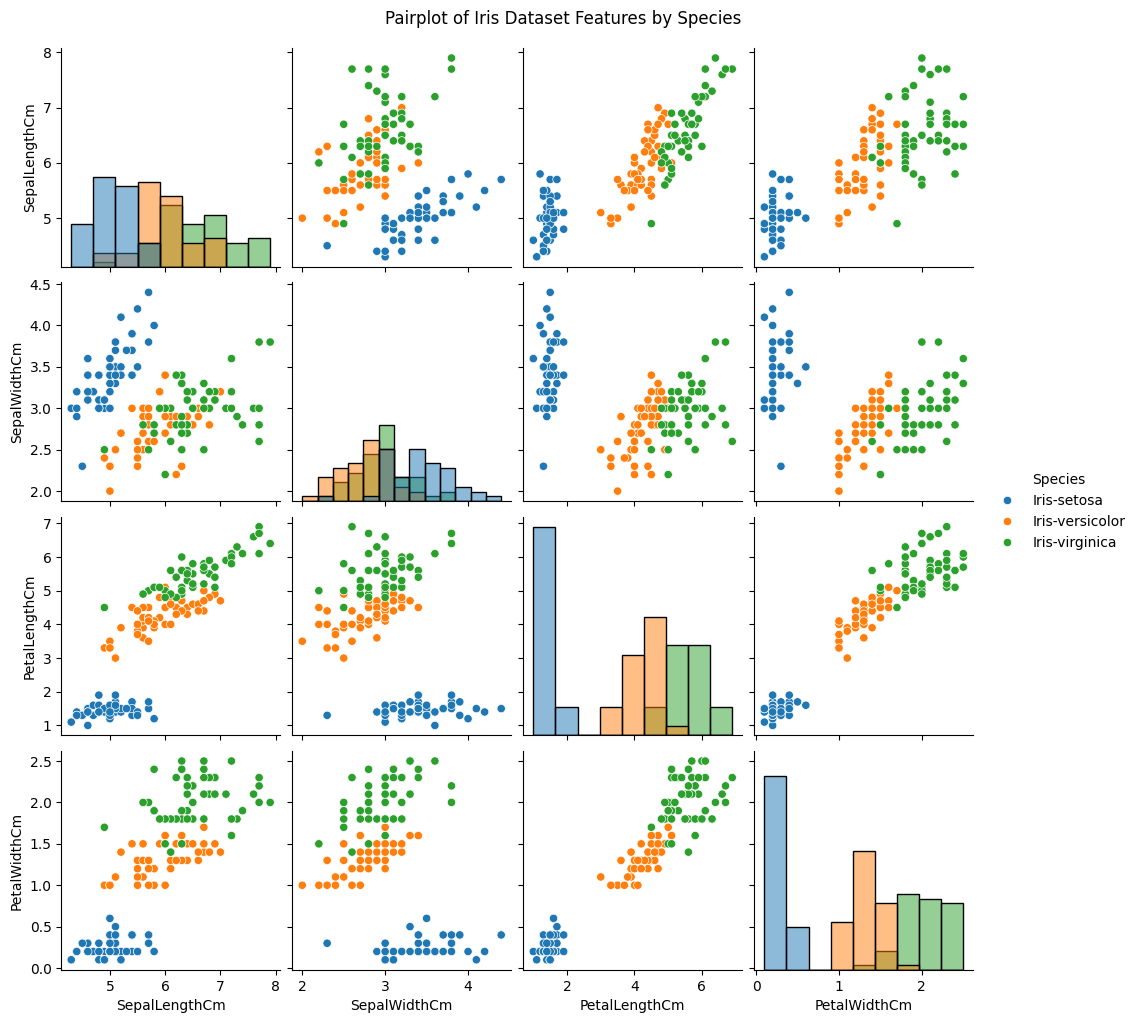

In [89]:
# Visualization 1: Pairplot of features
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.suptitle('Pairplot of Iris Dataset Features by Species', y=1.02)
plt.show()

## Split data

In [90]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardize features

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [92]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', random_state=42)
}

In [93]:
# Train and evaluate models
accuracies = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    predictions[name] = y_pred

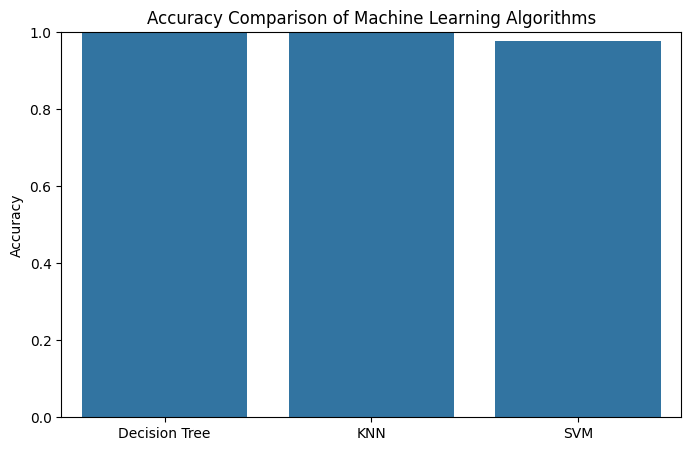

In [94]:
# Visualization 2: Bar plot of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Accuracy Comparison of Machine Learning Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

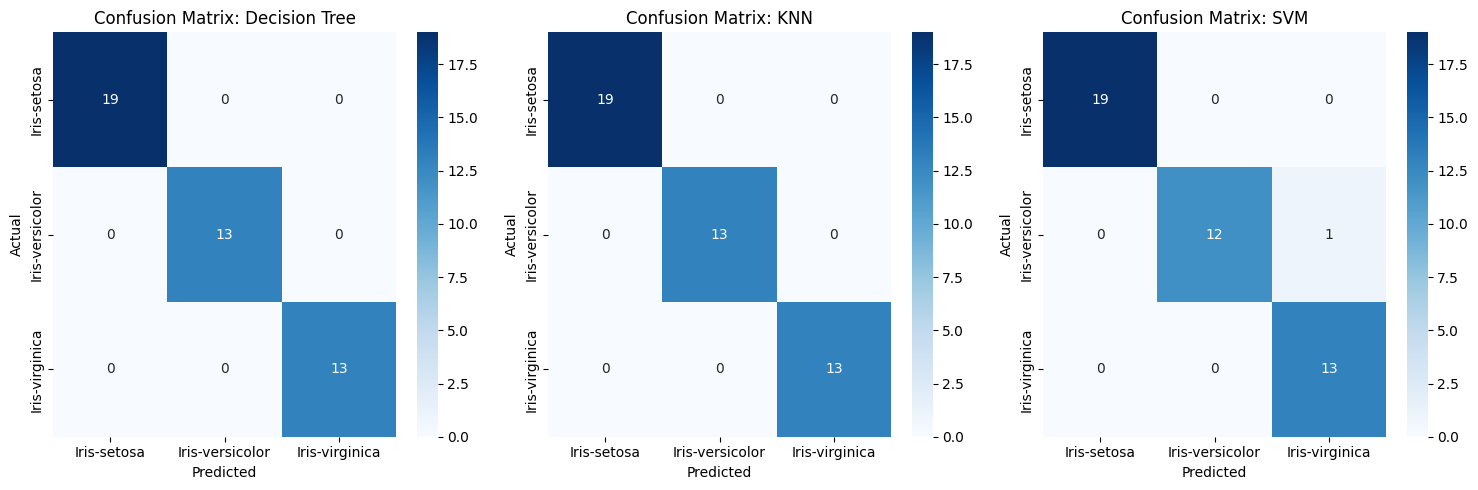

In [95]:
# Visualization 3: Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=target_names, yticklabels=target_names)
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [96]:
# Print classification reports
for name, y_pred in predictions.items():
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report for Decision Tree:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Classification Report for KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Classification Report for SVM:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      

# Evaluasi Performa Algoritma pada Dataset Iris

## 1. Performa Model Klasifikasi

### Decision Tree
- **Akurasi**: 1.00 (100%)
- **Precision / Recall / F1-Score**: 1.00 untuk semua kelas (Iris-setosa, Iris-versicolor, Iris-virginica)
- **Analisis**: Decision Tree mampu memisahkan ketiga kelas dengan sangat baik tanpa kesalahan klasifikasi pada data uji. Hal ini menunjukkan efektivitas yang tinggi pada dataset dengan batas kelas yang jelas seperti Iris.

### K-Nearest Neighbors (KNN)
- **Akurasi**: 1.00 (100%)
- **Precision / Recall / F1-Score**: 1.00 untuk semua kelas
- **Analisis**: KNN menunjukkan performa sempurna, didukung oleh struktur kelas yang jelas dan fitur yang telah distandardisasi. Algoritma ini sangat cocok digunakan pada dataset kecil dan bersih.

### Support Vector Machine (SVM)
- **Akurasi**: 0.98 (98%)
- **Precision / Recall / F1-Score**:
  - **Macro average**: ~0.97–0.98
  - **Weighted average**: ~0.97–0.98
- **Analisis**: SVM memberikan performa yang sangat baik, meskipun sedikit lebih rendah dibandingkan Decision Tree dan KNN. Hal ini kemungkinan disebabkan oleh sedikit overlap fitur antara kelas Versicolor dan Virginica yang menyebabkan pemisahan dengan hyperplane kurang optimal.

---

## 2. Analisis Visualisasi

### Pairplot
Visualisasi pairplot memperlihatkan bahwa fitur seperti panjang dan lebar petal memberikan pemisahan kelas yang jelas. Kelas Iris-setosa terpisah sempurna dari dua kelas lainnya. Overlap kecil antara Versicolor dan Virginica menjelaskan turunnya akurasi pada SVM.

### Bar Plot Akurasi
Plot ini menunjukkan bahwa Decision Tree dan KNN mencapai akurasi tertinggi (1.00), diikuti oleh SVM (0.98). Hal ini memperkuat bahwa ketiga algoritma sangat efektif untuk dataset Iris, dengan SVM sedikit lebih sensitif terhadap overlap fitur.

### Matriks Konfusi
Matriks konfusi untuk Decision Tree dan KNN menunjukkan prediksi sempurna (semua nilai berada pada diagonal). Untuk SVM, terdapat satu atau dua kesalahan klasifikasi, terutama antara kelas Versicolor dan Virginica, yang sesuai dengan nilai akurasi 98%.

---

## 3. Keunggulan dan Kelemahan Algoritma

### Decision Tree
- **Keunggulan**:
  - Mudah diinterpretasikan
  - Cepat dalam pelatihan dan prediksi
  - Sangat akurat pada dataset kecil dengan pemisahan kelas yang jelas
- **Kelemahan**:
  - Rentan terhadap overfitting pada dataset kompleks jika tidak dilakukan pruning atau tuning parameter

### K-Nearest Neighbors (KNN)
- **Keunggulan**:
  - Sederhana dan intuitif
  - Sangat akurat pada dataset kecil dan bersih
  - Tidak memerlukan asumsi distribusi data
- **Kelemahan**:
  - Sensitif terhadap pemilihan nilai k dan skala fitur
  - Kurang efisien untuk dataset besar karena proses pencarian tetangga

### Support Vector Machine (SVM)
- **Keunggulan**:
  - Efektif untuk data dengan margin pemisahan yang jelas
  - Relatif tahan terhadap noise kecil
- **Kelemahan**:
  - Performa bisa menurun jika terdapat overlap antar kelas
  - Memerlukan tuning parameter seperti kernel dan C
  - Waktu komputasi lebih lama untuk dataset besar

---

## 4. Rekomendasi

- Untuk dataset kecil dan terstruktur seperti Iris, algoritma KNN dan Decision Tree sangat direkomendasikan karena akurasi tinggi dan kemudahan implementasi.
- SVM tetap merupakan pilihan yang baik, namun memerlukan tuning parameter untuk mencapai performa maksimal.
- Visualisasi seperti pairplot sangat membantu dalam memahami struktur data.
- Matriks konfusi dan bar plot akurasi memberikan pemahaman yang lebih dalam mengenai kesalahan klasifikasi dan performa model.

---

## 5. Implikasi untuk Penelitian

- Dataset Iris, yang diperoleh dari file CSV (misalnya dari Kaggle), menunjukkan pentingnya pemilihan algoritma berdasarkan karakteristik data, seperti ukuran dan struktur kelas.
- Evaluasi model melalui metrik seperti akurasi, precision, recall, dan f1-score sangat penting untuk mengukur performa secara menyeluruh.
- Visualisasi menjadi alat bantu yang sangat berguna dalam menjelaskan hasil dan mendukung komunikasi ilmiah.
- Untuk pengujian lebih lanjut, dataset dengan kompleksitas yang lebih tinggi (misalnya Pima Indians Diabetes) dapat digunakan untuk menguji ketahanan algoritma terhadap noise dan ketidakseimbangan kelas.

---
